In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import sys
import os

import pandas as pd

sys.path.append('../../')
from ouster_tools.json.current_data_set import df_from_file

In [2]:
OU_ID = "bc0fa7.fffe.000792-1"

df = df_from_file("./ptp_json_log-00.txt")
df = df[df.id == OU_ID]
# convert nanos to micros
df["offset_from_master"] = df["offset_from_master"].astype(float) * 1e-3
df["mean_path_delay"] = df["mean_path_delay"].astype(float) * 1e-3

<IPython.core.display.Javascript object>


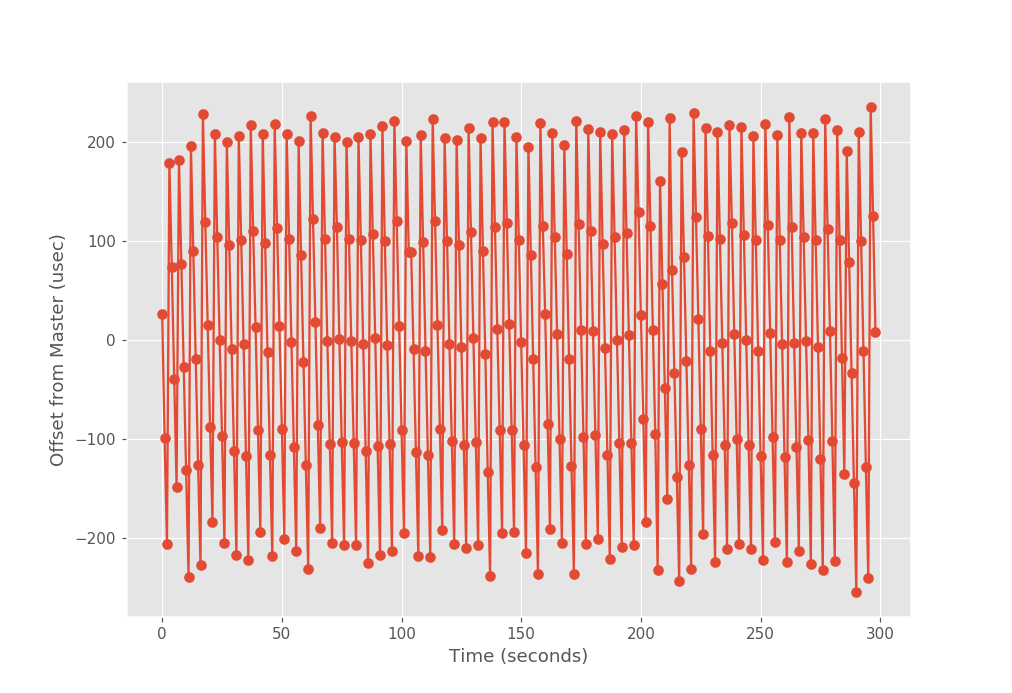

In [3]:
ax = df.plot(x=(df.recv_stamp - df.recv_stamp.iloc[0])*1e-9, 
             y="offset_from_master",
             legend=False, style=['-o'])
ax.set_xlabel("Time (seconds)")
_ = ax.set_ylabel("Offset from Master (usec)")